In [1]:
# Create a virtual environment using Anaconda/Miniconda
# conda create -n msds640 python=3.10.18 -y
# conda activate sentence

# Install required packages
# !pip install pandas numpy seaborn matplotlib ydata-profiling
# !pip install -r requirements.txt
# !pip install fuzzywuzzy
# !pip install fairlearn

## Dataset can be found at:
https://www.kaggle.com/datasets/surendra365/recruitement-dataset

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from fuzzywuzzy import fuzz
from collections import Counter

from custom_functions import (
    display_unique_category_values, plot_eda, clean_resume, pre_process, remove_texts,
      evaluate_classifiers, live_data_evaluation)

# Configure matplotlib to display plots inline
%matplotlib inline
# Set style for better-looking visualizations
# plt.style.use('seaborn')
sns.set_palette('deep')
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\saman\anaconda3\envs\msds640\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
stopwords = set(stopwords.words("english"))

# Initialize PorterStemmer
stemmer = PorterStemmer()

In [4]:
# Load the dataset
df = pd.read_csv('C:/Personal/Regis/MSDS640/data/job_applicant_dataset.csv')
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head(5))

# Display data types and non-null counts
print("\nDataset Info:")
df.info()

Dataset Shape: (10000, 9)

First few rows:


,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Applicant Name  10000 non-null  object
 1   Age                 10000 non-null  int64 
 2   Gender              10000 non-null  object
 3   Race                10000 non-null  object
 4   Ethnicity           10000 non-null  object
 5   Resume              10000 non-null  object
 6   Job Roles           10000 non-null  object
 7   Job Description     10000 non-null  object
 8   Best Match          10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


#### Data Inspection and Data Cleaning

In [5]:
# Checking for missing values
df.isnull().sum()

Job Applicant Name    0
Age                   0
Gender                0
Race                  0
Ethnicity             0
Resume                0
Job Roles             0
Job Description       0
Best Match            0
dtype: int64

In [6]:
#df['Gender'].value_counts()

In [7]:
#df['Race'].value_counts()

In [8]:
#df['Ethnicity'].value_counts()

In [9]:
df['Job Roles'].value_counts()

Job Roles
Personal Trainer                   226
Urban Planner                      220
Biomedical Engineer                220
Construction Manager               215
Mechanical Engineer                214
Robotics Engineer                  214
Operations Manager                 209
Pilot                              209
Machine Learning Engineer          208
Web Developer                      207
Financial Analyst                  206
Systems Analyst                    203
Environmental Scientist            203
Creative Director                  203
Chef                               202
Data Analyst                       202
HR Specialist                      201
Event Planner                      201
AI Researcher                      201
Physician                          201
Supply Chain Manager               199
Civil Engineer                     199
Accountant                         199
Sales Representative               199
SEO Specialist                     198
Software Engine

In [10]:
#df['Best Match'].value_counts()

In [11]:
#plot_eda(df)

In [12]:
df[df.duplicated()==True]

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match


In [13]:
#df = df.drop(["Job Applicant Name", "Age", "Race", "Ethnicity",
#               "Job Description"], axis=1)

In [14]:
df['Resume Length'] = df['Resume'].apply(lambda x: len(str(x).split()))

In [15]:
df.head(5)

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match,Resume Length
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0,39
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0,38
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0,37
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,36
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,38


In [16]:
df['Cleaned Resume'] = df.Resume.apply(lambda x: clean_resume(x))
df['Cleaned Resume Length'] = df['Cleaned Resume'].apply(lambda x: len(str(x).split()))
df.head(5)

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match,Resume Length,Cleaned Resume,Cleaned Resume Length
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0,39,Proficient in Injury Prevention Motivation Nut...,40
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0,38,Proficient in Healthcare Pharmacology Medical ...,39
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0,37,Proficient in Forecasting Financial Modelling ...,38
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,36,Proficient in Budgeting Supply Chain Optimizat...,37
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,38,Proficient in Logistics Negotiation Procuremen...,39


In [17]:
# Create copies of the dataset
df_job_role = df.copy()
df_best_match = df.copy()

# Target is Job Role

In [18]:
#Ethical framework - removing biased words
bias_exclusions = ["Mongoloid/Asian", "White/Caucasian", "Negroid/Black",
                    "Mongoloid", "White", "Negroid", "Asian", "Caucasian",
                      "Black", "Vietnamese", "Filipino", "Chinese", "Irish",
                        "Kenyan", "African", "Ghanaian", "English", "Japanese",
                          "Polish", "Caribbean", "French", "Dutch", "German", "Jamaican",
                            "Korean", "Indian", "Nigerian", "Ethiopian", "Italian", "Thai"]

df_job_role['Cleaned Resume'] = pre_process(df_job_role['Cleaned Resume'], stopwords, bias_exclusions, stemmer)
df_job_role['Cleaned Resume Length'] = df_job_role['Cleaned Resume'].apply(lambda x: len(str(x).split()))
df_job_role.head(5)

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match,Resume Length,Cleaned Resume,Cleaned Resume Length
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0,39,profici injuri prevent motiv nutrit health coa...,29
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0,38,profici healthcar pharmacolog medic terminolog...,29
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0,37,profici forecast financi model excel budget ma...,28
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,36,profici budget suppli chain optim risk manag l...,27
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,38,profici logist negoti procur suppli chain opti...,29


In [19]:
df_job_role = df_job_role.drop(["Resume", "Resume Length"], axis=1)

In [20]:
#Remove duplicate words from same resume
def process_string(text):
    if pd.isna(text):  # Handle NaN values
        return text
    words = str(text).split()
    unique_words = []
    seen_words = set()
    for word in words:
        if word not in seen_words:
            unique_words.append(word)
            seen_words.add(word)
    return ' '.join(unique_words)

df_job_role["Cleaned Resume"] = df_job_role["Cleaned Resume"].apply(process_string)

df_job_role['Cleaned Resume Length'] = df_job_role['Cleaned Resume'].apply(lambda x: len(str(x).split()))
df_job_role.head(5)


,Job Applicant Name,Age,Gender,Race,Ethnicity,Job Roles,Job Description,Best Match,Cleaned Resume,Cleaned Resume Length
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,Fitness Coach,A Fitness Coach is responsible for helping cl...,0,profici injuri prevent motiv nutrit health coa...,28
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,Physician,"Diagnose and treat illnesses, prescribe medica...",0,profici healthcar pharmacolog medic terminolog...,27
2,Sarah Martin,46,Female,White/Caucasian,Dutch,Financial Analyst,"As a Financial Analyst, you will be responsibl...",0,profici forecast financi model excel budget ma...,27
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,profici budget suppli chain optim risk manag l...,24
4,James Davis,49,Male,White/Caucasian,English,Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,profici logist negoti procur suppli chain opti...,27


In [21]:
len(df_job_role)

10000

In [22]:
#Remove common words and almost similar resumes with same job role

# Remove common words from resumes with same job role
#len_subset = len(df_job_role)
#accepted_word_count = math.floor(len_subset / 2)
exclusion_list = []
all_words = ' '.join(df_job_role["Cleaned Resume"]).split()
word_counts = Counter(all_words)

word_freq = pd.DataFrame(word_counts.most_common(100), columns=["Word", "Frequency"])
print(word_freq)
for index, row in word_freq.iterrows():
    if row['Frequency'] > 500:
        exclusion_list.append(row['Word'])

df_job_role['Cleaned Resume'] = remove_texts(df_job_role['Cleaned Resume'], exclusion_list)

#Remove almost similar resumes with same job role
similarity_threshold = 70
# List to store results
processed_subsets = [] 
# Loop over 'Job Roles' column
for grp, subset in df_job_role.groupby("Job Roles"):
    rows_to_drop = set()
    
    for i in range(len(subset)):
        if i in rows_to_drop: # Skip if already marked for dropping
            continue
        for j in range(i + 1, len(subset)):
            if j in rows_to_drop: # Skip if already marked for dropping
                continue
            str1 = subset["Cleaned Resume"].iloc[i]
            str2 = subset["Cleaned Resume"].iloc[j]
            # Calculate partial ratio for flexibility
            score = fuzz.partial_ratio(str1, str2)

            if score >= similarity_threshold:
                rows_to_drop.add(j) # Mark the later row for dropping
   
    rows_to_drop_index = subset.index[list(rows_to_drop)]
    subset = subset.drop(rows_to_drop_index, axis=0)

    # Append processed subset
    processed_subsets.append(subset)

# Combine all processed subsets
processed_df_job_role = pd.concat(processed_subsets)

processed_df_job_role['Cleaned Resume Length'] = processed_df_job_role['Cleaned Resume'].apply(lambda x: len(str(x).split()))
processed_df_job_role.head(5)

        Word  Frequency
0    profici      10000
1      level      10000
2     experi      10000
3      field      10000
4       hold      10000
..       ...        ...
95  structur        307
96   sustain        306
97     motiv        305
98     robot        303
99     brand        302

[100 rows x 2 columns]


,Job Applicant Name,Age,Gender,Race,Ethnicity,Job Roles,Job Description,Best Match,Cleaned Resume,Cleaned Resume Length
27,Evan Collins,32,Male,White/Caucasian,Italian,AI Researcher,An AI Researcher is at the forefront of advanc...,0,innov program methodolog machin deep ai,6
58,Ryo Fukuda,43,Male,Mongoloid/Asian,Indian,AI Researcher,An AI Researcher is at the forefront of advanc...,0,artifici intellig build program methodolog sci...,8
133,Grant Powell,34,Male,White/Caucasian,Italian,AI Researcher,An AI Researcher is at the forefront of advanc...,0,program deep machin artifici intellig scientist,6
206,Allison Carter,25,Female,White/Caucasian,French,AI Researcher,An AI Researcher is at the forefront of advanc...,1,methodolog innov program scientist,4
225,DeMarcus Adams,53,Male,Negroid/Black,Kenyan,AI Researcher,An AI Researcher is at the forefront of advanc...,0,deep innov artifici intellig machin special an...,8


In [23]:
len(processed_df_job_role)

1052

### Supervised Learning

In [24]:
# Convert categorical job role to numeric
from sklearn.preprocessing import LabelEncoder

var_mod = ['Job Roles']
le = LabelEncoder()
for i in var_mod:
    processed_df_job_role[i] = le.fit_transform(processed_df_job_role[i])

In [25]:
live_df = processed_df_job_role.sample(n=300)

In [26]:
print("Length before dropping live data - " + str(len(processed_df_job_role)))
processed_supervised_df_job_role = processed_df_job_role.drop(live_df.index)
print("Length after dropping live data - " + str(len(processed_supervised_df_job_role)))

Length before dropping live data - 1052
Length after dropping live data - 752


In [27]:
required_text = processed_supervised_df_job_role['Cleaned Resume']
required_target = processed_supervised_df_job_role['Job Roles']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(required_text)
word_features = word_vectorizer.transform(required_text)

65-35 split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(word_features,required_target,random_state=42,
                                                  test_size=0.35, shuffle=True,
                                                    stratify=required_target)
print(X_train.shape)
print(X_test.shape)

(488, 551)
(264, 551)


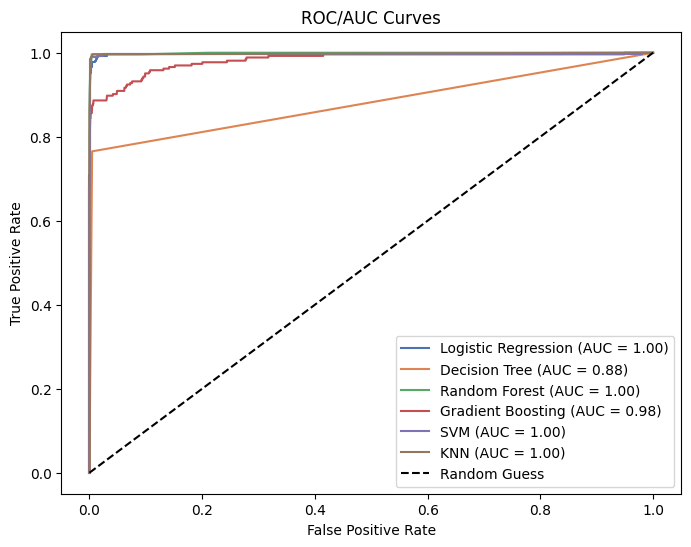

                 Model  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.946970   0.943237  0.946970  0.934740   
1        Decision Tree  0.765152   0.792843  0.765152  0.762958   
2        Random Forest  0.946970   0.954739  0.946970  0.940690   
3    Gradient Boosting  0.844697   0.893696  0.844697  0.847612   
4                  SVM  0.973485   0.976341  0.973485  0.970055   
5                  KNN  0.935606   0.944004  0.935606  0.928262   

  Training & test  
0   0.980 & 0.947  
1   1.000 & 0.765  
2   1.000 & 0.947  
3   1.000 & 0.845  
4   0.996 & 0.973  
5   0.971 & 0.936  


In [29]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

Testing with live data

In [30]:
x_live_text = live_df['Cleaned Resume'].values
y_live_target = live_df['Job Roles'].values

live_word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
live_word_vectorizer.fit(x_live_text)
live_word_features = word_vectorizer.transform(x_live_text)

In [31]:
results_df = live_data_evaluation(live_word_features, y_live_target)
print(results_df)

                 Model  Accuracy on live data set
0  Logistic Regression                   0.936667
1        Decision Tree                   0.680000
2        Random Forest                   0.930000
3    Gradient Boosting                   0.780000
4                  SVM                   0.960000
5                  KNN                   0.946667


### Unsupervised Learning

In [32]:
len(processed_df_job_role)

1052

In [33]:
requiredText = processed_df_job_role['Cleaned Resume'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
Word_features = word_vectorizer.transform(requiredText)

In [34]:
# fit the model for a range of 2 to 25 clusters
for n in range (2,26):
    # random_state makes the results reproducible
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(Word_features)
    # gather the predictions
    preds= model.predict(Word_features)
    score = metrics.silhouette_score(Word_features, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.015486179366299303
Silhouette score for  3  clusters:  0.02266592563634394
Silhouette score for  4  clusters:  0.023917329494129298
Silhouette score for  5  clusters:  0.03315484576396495
Silhouette score for  6  clusters:  0.03896201572362415
Silhouette score for  7  clusters:  0.04421828481256486
Silhouette score for  8  clusters:  0.053415863156060776
Silhouette score for  9  clusters:  0.05617969753622691
Silhouette score for  10  clusters:  0.05996206167797882
Silhouette score for  11  clusters:  0.06544577173090264
Silhouette score for  12  clusters:  0.06692543025109292
Silhouette score for  13  clusters:  0.07417391622211023
Silhouette score for  14  clusters:  0.0749106488303275
Silhouette score for  15  clusters:  0.07853246174752751
Silhouette score for  16  clusters:  0.0845308748597638
Silhouette score for  17  clusters:  0.09151803254326972
Silhouette score for  18  clusters:  0.10066770425475684
Silhouette score for  19  clusters:  0

In [35]:
# fit the model for a range of 25 to 50 clusters
for n in range (26,51):
    # random_state makes the results reproducible
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(Word_features)
    # gather the predictions
    preds= model.predict(Word_features)
    score = metrics.silhouette_score(Word_features, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  26  clusters:  0.14052139476426562
Silhouette score for  27  clusters:  0.14672726328212723
Silhouette score for  28  clusters:  0.1493060986776329
Silhouette score for  29  clusters:  0.1535553729283288
Silhouette score for  30  clusters:  0.15687731393004867
Silhouette score for  31  clusters:  0.15576867074070144
Silhouette score for  32  clusters:  0.15358845414136743
Silhouette score for  33  clusters:  0.1552009877267128
Silhouette score for  34  clusters:  0.15951702569885354
Silhouette score for  35  clusters:  0.1640133666488532
Silhouette score for  36  clusters:  0.16690001492190498
Silhouette score for  37  clusters:  0.17019466948202985
Silhouette score for  38  clusters:  0.17379950931622004
Silhouette score for  39  clusters:  0.17483222936782067
Silhouette score for  40  clusters:  0.17749326267321472
Silhouette score for  41  clusters:  0.1730860644783839
Silhouette score for  42  clusters:  0.17595643937789873
Silhouette score for  43  clusters: 

## Target is Best Match

In [36]:
# Remove common words from resumes with same job role
all_words = ' '.join(df_best_match["Cleaned Resume"]).split()
word_counts = Counter(all_words)

word_freq = pd.DataFrame(word_counts.most_common(25), columns=["Word", "Frequency"])
print(word_freq)

              Word  Frequency
0               in      30257
1            Holds      20000
2              and      10582
3              the      10066
4       Proficient      10000
5             with      10000
6            level      10000
7       experience      10000
8            field      10000
9                a      10000
10          degree      10000
11  certifications      10000
12            such      10000
13              as      10000
14         Skilled      10000
15      delivering      10000
16         results      10000
17        adapting      10000
18              to      10000
19         dynamic      10000
20    environments      10000
21          senior       6806
22       Certified       4628
23      Management       4188
24             PhD       3369


In [37]:
#Removing common words
exclusions = ["in", "Holds", "and", "the", "Proficient", "with", "level", "experience",
                    "field", "a", "degree", "certifications", "such", "as", "Skilled", "delivering",
                      "results", "adapting", "to", "dynamic", "environments"]

#stopwords = set(stopwords.words("english"))

df_best_match['Cleaned Resume'] = pre_process(df_best_match['Cleaned Resume'], stopwords, exclusions, stemmer)
df_best_match['Cleaned Resume Length'] = df_best_match['Cleaned Resume'].apply(lambda x: len(str(x).split()))
df_best_match.head(5)

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match,Resume Length,Cleaned Resume,Cleaned Resume Length
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0,39,profici injuri prevent motiv nutrit health coa...,19
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0,38,profici healthcar pharmacolog medic terminolog...,19
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0,37,profici forecast financi model excel budget ma...,18
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,36,profici budget suppli chain optim risk manag l...,17
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1,38,profici logist negoti procur suppli chain opti...,19


In [38]:
len(df_best_match)

10000

In [39]:
#live_df_best_match = df_best_match.sample(n=3000)
#print("Length before dropping live data - " + str(len(df_best_match)))
#supervised_df_best_match = df_best_match.drop(live_df_best_match.index)
#print("Length after dropping live data - " + str(len(supervised_df_best_match)))

In [40]:
required_text_best_match = df_best_match['Cleaned Resume'].values
required_target_best_match = df_best_match['Best Match'].values
sensitive_feature = df_best_match['Gender']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(required_text_best_match)
word_features_best_match = word_vectorizer.transform(required_text_best_match)

## Unsupervised Learning

In [41]:
# fit the model for a range of 2 to 25 clusters
for n in range (2,26):
    # random_state makes the results reproducible
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(word_features_best_match)
    # gather the predictions
    preds= model.predict(word_features_best_match)
    score = metrics.silhouette_score(word_features_best_match, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.020040386508793123
Silhouette score for  3  clusters:  0.02987583948852706
Silhouette score for  4  clusters:  0.03617887862427958
Silhouette score for  5  clusters:  0.04145960199565127
Silhouette score for  6  clusters:  0.045705332095260016
Silhouette score for  7  clusters:  0.05362268063230325
Silhouette score for  8  clusters:  0.06043865201651686
Silhouette score for  9  clusters:  0.06664952038738177
Silhouette score for  10  clusters:  0.07362134842760766
Silhouette score for  11  clusters:  0.0797967536582349
Silhouette score for  12  clusters:  0.08098372473629224
Silhouette score for  13  clusters:  0.08632948674664025
Silhouette score for  14  clusters:  0.08856425153067245
Silhouette score for  15  clusters:  0.09404721832445666
Silhouette score for  16  clusters:  0.09976837674883726
Silhouette score for  17  clusters:  0.10446332763812638
Silhouette score for  18  clusters:  0.10619961994465962
Silhouette score for  19  clusters:  0

In [42]:
# fit the model for a range of 2 to 25 clusters
for n in range (26,51):
    # random_state makes the results reproducible
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(word_features_best_match)
    # gather the predictions
    preds= model.predict(word_features_best_match)
    score = metrics.silhouette_score(word_features_best_match, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  26  clusters:  0.14825908631406706
Silhouette score for  27  clusters:  0.14685540924522494
Silhouette score for  28  clusters:  0.14908732414995127
Silhouette score for  29  clusters:  0.1537083521363083
Silhouette score for  30  clusters:  0.1549510202936571
Silhouette score for  31  clusters:  0.15118646509282394
Silhouette score for  32  clusters:  0.1562653149080821
Silhouette score for  33  clusters:  0.16092614226443033
Silhouette score for  34  clusters:  0.16733653049533223
Silhouette score for  35  clusters:  0.17053479859277207
Silhouette score for  36  clusters:  0.1739571559155304
Silhouette score for  37  clusters:  0.17881430550714444
Silhouette score for  38  clusters:  0.18157552378038103
Silhouette score for  39  clusters:  0.1834538144638822
Silhouette score for  40  clusters:  0.18249099835107177
Silhouette score for  41  clusters:  0.1857432819210371
Silhouette score for  42  clusters:  0.1891167402425126
Silhouette score for  43  clusters:  0

## Supervised Learning

In [43]:

X_train,X_test,y_train,y_test = train_test_split(word_features_best_match,required_target_best_match,random_state=42, test_size=0.40,
                                                 shuffle=True, stratify=required_target_best_match)
print(X_train.shape)
print(X_test.shape)


(6000, 601)
(4000, 601)


[Skipped ROC for SVM] too many indices for array: array is 1-dimensional, but 2 were indexed


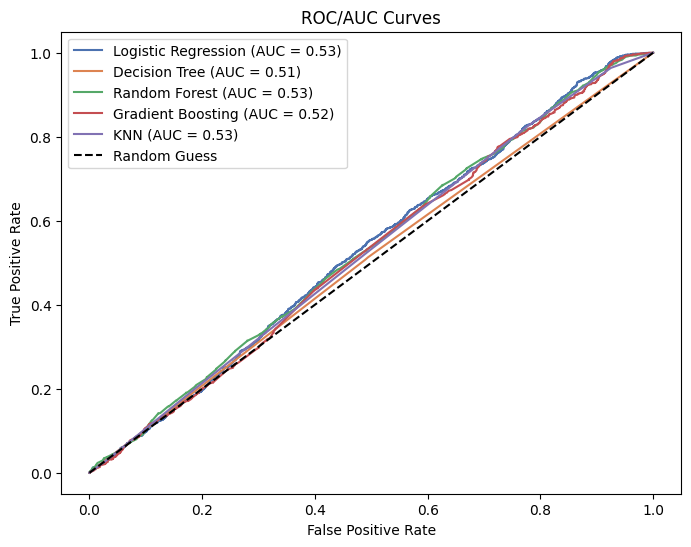

                 Model  Accuracy  Precision   Recall  F1-score Training & test
0  Logistic Regression   0.52650   0.526388  0.52650  0.526436   0.608 & 0.526
1        Decision Tree   0.50900   0.509389  0.50900  0.509109   0.996 & 0.509
2        Random Forest   0.52100   0.521087  0.52100  0.521039   0.996 & 0.521
3    Gradient Boosting   0.52000   0.518318  0.52000  0.516564   0.664 & 0.520
4                  SVM   0.51800   0.518221  0.51800  0.518081   0.720 & 0.518
5                  KNN   0.51575   0.516444  0.51575  0.515830   0.700 & 0.516


In [44]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

X = df_best_match["Cleaned Resume"]
y = df_best_match["Best Match"]
sensitive_attr = df_best_match["Gender"]

# --- Step 2: Split ---
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(
    X, y, sensitive_attr, test_size=0.3, random_state=42
)

# --- Step 3: Vectorize resumes ---
tfidf = TfidfVectorizer(stop_words="english", max_features=None)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- Step 4: Train baseline model ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# --- Step 5: Fairness evaluation (before mitigation) ---
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=s_test
)

#print(frame.overall)
print(frame.by_group)
print("\nDifferences")
print(frame.difference(method="between_groups"))

# --- Step 6: Apply fairness mitigator (ExponentiatedGradient + DemographicParity) ---
# Note: Requires dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

constraint = DemographicParity()
base_estimator = LogisticRegression(max_iter=1000)

mitigator = ExponentiatedGradient(
    estimator=base_estimator,
    constraints=constraint
)
mitigator.fit(X_train_dense, y_train, sensitive_features=s_train)

y_pred_mitigated = mitigator.predict(X_test_dense)

# --- Step 7: Fairness evaluation (after mitigation) ---
frame_mitigated = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=s_test
)

print("\nAfter Mitigation")
print(frame_mitigated.by_group)
print("\nDifferences")
print(frame_mitigated.difference(method="between_groups"))

        accuracy  precision    recall  selection_rate
Gender                                               
Female  0.491373   0.346726  0.438795        0.463768
Male    0.522888   0.650704  0.484277        0.457769

Differences
accuracy          0.031515
precision         0.303978
recall            0.045482
selection_rate    0.005999
dtype: float64

After Mitigation
        accuracy  precision    recall  selection_rate
Gender                                               
Female  0.492754   0.349558  0.446328        0.467909
Male    0.524178   0.652542  0.484277        0.456480

Differences
accuracy          0.031424
precision         0.302985
recall            0.037949
selection_rate    0.011429
dtype: float64


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

X = df_best_match["Cleaned Resume"]
y = df_best_match["Best Match"]
sensitive_attr = df_best_match["Race"]

# --- Step 2: Split ---
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(
    X, y, sensitive_attr, test_size=0.3, random_state=42
)

# --- Step 3: Vectorize resumes ---
tfidf = TfidfVectorizer(stop_words="english", max_features=None)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- Step 4: Train baseline model ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# --- Step 5: Fairness evaluation (before mitigation) ---
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=s_test
)

#print(frame.overall)
print(frame.by_group)
print("\nDifferences")
print(frame.difference(method="between_groups"))

# --- Step 6: Apply fairness mitigator (ExponentiatedGradient + DemographicParity) ---
# Note: Requires dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

constraint = DemographicParity()
base_estimator = LogisticRegression(max_iter=1000)

mitigator = ExponentiatedGradient(
    estimator=base_estimator,
    constraints=constraint
)
mitigator.fit(X_train_dense, y_train, sensitive_features=s_train)

y_pred_mitigated = mitigator.predict(X_test_dense)

# --- Step 7: Fairness evaluation (after mitigation) ---
frame_mitigated = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=s_test
)

print("\nAfter Mitigation")
print(frame_mitigated.by_group)
print("\nDifferences")
print(frame_mitigated.difference(method="between_groups"))

                 accuracy  precision    recall  selection_rate
Race                                                          
Mongoloid/Asian  0.518556   0.522484  0.487026        0.468405
Negroid/Black    0.488157   0.502273  0.442886        0.453141
White/Caucasian  0.515504   0.484211  0.474227        0.460271

Differences
accuracy          0.030399
precision         0.038273
recall            0.044140
selection_rate    0.015264
dtype: float64

After Mitigation
                 accuracy  precision    recall  selection_rate
Race                                                          
Mongoloid/Asian  0.518556   0.522678  0.483034        0.464393
Negroid/Black    0.485067   0.498856  0.436874        0.450051
White/Caucasian  0.513566   0.482030  0.470103        0.458333

Differences
accuracy          0.033489
precision         0.040649
recall            0.046160
selection_rate    0.014342
dtype: float64


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

X = df_best_match["Cleaned Resume"]
y = df_best_match["Best Match"]
sensitive_attr = df_best_match["Ethnicity"]

# --- Step 2: Split ---
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(
    X, y, sensitive_attr, test_size=0.3, random_state=42
)

# --- Step 3: Vectorize resumes ---
tfidf = TfidfVectorizer(stop_words="english", max_features=None)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- Step 4: Train baseline model ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# --- Step 5: Fairness evaluation (before mitigation) ---
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate
}

frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=s_test
)

#print(frame.overall)
print(frame.by_group)
print("\nDifferences")
print(frame.difference(method="between_groups"))

# --- Step 6: Apply fairness mitigator (ExponentiatedGradient + DemographicParity) ---
# Note: Requires dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

constraint = DemographicParity()
base_estimator = LogisticRegression(max_iter=1000)

mitigator = ExponentiatedGradient(
    estimator=base_estimator,
    constraints=constraint
)
mitigator.fit(X_train_dense, y_train, sensitive_features=s_train)

y_pred_mitigated = mitigator.predict(X_test_dense)

# --- Step 7: Fairness evaluation (after mitigation) ---
frame_mitigated = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=s_test
)

print("\nAfter Mitigation")
print(frame_mitigated.by_group)
print("\nDifferences")
print(frame_mitigated.difference(method="between_groups"))

            accuracy  precision    recall  selection_rate
Ethnicity                                                
African     0.523077   0.442308  0.410714        0.400000
Caribbean   0.546053   0.600000  0.506024        0.460526
Chinese     0.541667   0.491525  0.446154        0.409722
Dutch       0.534722   0.483871  0.461538        0.430556
English     0.503226   0.408451  0.453125        0.458065
Ethiopian   0.503497   0.492958  0.500000        0.496503
Filipino    0.514493   0.530303  0.492958        0.478261
French      0.489655   0.442623  0.402985        0.420690
German      0.514925   0.516667  0.462687        0.447761
Ghanaian    0.473333   0.451613  0.383562        0.413333
Indian      0.488722   0.551724  0.432432        0.436090
Irish       0.532544   0.531646  0.500000        0.467456
Italian     0.539007   0.542857  0.535211        0.496454
Jamaican    0.387597   0.500000  0.367089        0.449612
Japanese    0.466216   0.424658  0.455882        0.493243
Kenyan      0.